# Tutorial: Social Network Analysis in Python

In this tutorial, we will broach the subject of social networks, using Python.

In particular, we will use [SNAP](http://snap.stanford.edu/snappy/index.html) to do the analyses.

## Why Social Network Analysis?

Social networks are fundamental to society to analyze the complex relationships and patterns in society. Today, with the increasing importance and usage of technology, human relationships have grown in magnitude. Platforms such as Facebook and Twitter provide vast amounts of data to analyze, necessitating the usage of large-scale methods to analyze these networks.

## Getting Started

From [here](http://snap.stanford.edu/snappy/index.html#download), we can download and install `SNAP`; the process itself is not too involved and should be fairly simple to carry out. Note that [Gnuplot](http://www.gnuplot.info/) and [Graphviz](http://www.graphviz.org/) will also need to be installed for any visualizations. Ensure that the executables are added to your PATH variable or place the executables in your working directory. To ensure that `Gnuplot` and `Graphviz` are on your path, run  `os.environ["PATH"]`.

In [1]:
from snap import *
import random
import os
from IPython.display import Image

If the above line works, then `SNAP` has been installed.

## Types in `SNAP`

`SNAP` is slightly different than regular Python, as it uses some of its own data structures, which are faster than those of Python. More importantly, these data structures are **typed**. In `SNAP`, there are 3 types: `int`, `float`, and `str`, which are known as `TInt`, `TFlt`, and `TStr`.

A few data structures are of great importance and will be used frequently:
* Vectors
* Hash sets
* Graphs

Vectors are essentially typed lists, and can be used in a similar fashion.

In [2]:
# Creates a vector of floats
v = TFltV()

# Adds values to the vector
v.Add(1.0)
v.Add(3.14)
v.Add(15.388)

# Finds length of the vector
print "Length of v: {}".format(len(v))

# Gets value at an index of the vector
print "Value of v[1]: {}".format(v[1])

# Replace a value at an index of the vector
v[1] = 10
print "Value of v[1]: {}".format(v[1])

Length of v: 3
Value of v[1]: 3.14
Value of v[1]: 10.0


Hash tables are essentially dictionaries, and can be used in a similar fashion.

In [3]:
# Creates a hash table of string keys and integer values
h = TStrIntH()

# Adds values to the hash table
h["a"] = 10
h["e"] = 15
h["o"] = 25

# Finds length of the hash table
print "Length of v: {}".format(len(h))

# Gets value for a key of the hash table
print "Value of h[\"a\"]: {}".format(h["a"])

# Replace a value at a key of the hash table
h["a"] = 1
print "Value of h[\"a\"]: {}".format(h["a"])

Length of v: 3
Value of h["a"]: 10
Value of h["a"]: 1


Graphs in `SNAP` are slightly more sophisticated. We'll focus on traditional graphs which have a single edge between a pair of nodes; note that `SNAP` does have functionality to create directed multigraphs, which have multiple directed edges between a pair of nodes.

In [4]:
# Create a new undirected graph
UG = TUNGraph.New()

# Create a new directed graph
DG = TNGraph.New()

# Add nodes
UG.AddNode(1)
UG.AddNode(2)
UG.AddNode(3)

DG.AddNode(4)
DG.AddNode(5)
DG.AddNode(6)

# Add edges
UG.AddEdge(1, 3)
UG.AddEdge(2, 3)

DG.AddEdge(4, 5)
DG.AddEdge(6, 5)

# Create a random graph with 10 nodes and 50 edges
Rand_G = GenRndGnm(PNGraph, 10, 50)

## Basic Example

Now that `SNAP` has been installed and some basics have been covered, we can try out a basic example to get used to using the library.

Suppose we have 5 boys and we want to know which boys are friends. For simplicity's sake, let's call the 5 children Adam, Brandon, Charlie, Daniel, and Eric.

Suppose boy $i$ could consider boy $j$ as his friend, but boy $j$ would not necessarily need to consider boy $i$ as his friend.  Hence, we define ties between boy $i$ and boy $j$ as:

$$\begin{cases}
1 & \text{if boy $i$ considers boy $j$ as his friend, where $i \neq j$}\\
0 & \text{otherwise}
\end{cases}$$

In addition, we do **not** allow self-ties; e.g. Adam will not have a tie with himself.

We can randomly create this so-called friendship network:

In [5]:
random.seed(15388)
friendship_matrix = [[0 for _ in xrange(5)] for _ in xrange(5)]
for i in xrange(5):
    for j in xrange(5):
        if (i != j):
            friendship_matrix[i][j] = int(round(random.random()))
print friendship_matrix

[[0, 1, 0, 1, 1], [1, 0, 1, 1, 1], [0, 1, 0, 0, 0], [1, 0, 0, 0, 0], [0, 0, 1, 1, 0]]


Using this randomly created matrix, we can create a graph using `SNAP`.

In [6]:
G1 = TNGraph.New()
G1.AddNode(0)
G1.AddNode(1)
G1.AddNode(2)
G1.AddNode(3)
G1.AddNode(4)

names = TIntStrH()
names[0] = "Adam"
names[1] = "Brandon"
names[2] = "Charlie"
names[3] = "Daniel"
names[4] = "Eric"

for i in xrange(5):
    for j in xrange(5):
        if friendship_matrix[i][j] == 1:
            G1.AddEdge(i, j)
print "G1: Nodes %d, Edges %d" % (G1.GetNodes(), G1.GetEdges())

G1: Nodes 5, Edges 11


Now that we have the graph, we can first visualize it using `Graphviz`.

In [7]:
DrawGViz(G1, gvlNeato, "G1.png", "Friendship Network", names)

`SNAP` writes it to a `.png` file in the directory where this tutorial is located; we can retrieve it easily:

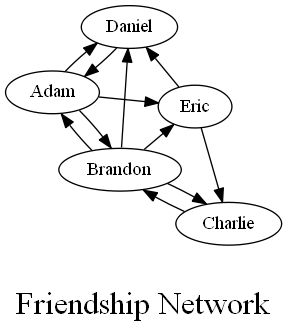

In [8]:
Image(filename = "G1.png") 

Using this network, we can use `SNAP` to find some simple network attributes. For example, we can obtain the in-degree and out-degree of each node. We can also obtain all of the edges of the network.

In [9]:
for node in G1.Nodes():
    print "Node: {}, Out-Degree: {}, In-Degree {}".format(node.GetId(), node.GetOutDeg(), node.GetInDeg())
    
for edge in G1.Edges():
    print "Edge Source: {}, Edge Destination: {}".format(edge.GetSrcNId(), edge.GetDstNId())

Node: 0, Out-Degree: 3, In-Degree 2
Node: 1, Out-Degree: 4, In-Degree 2
Node: 2, Out-Degree: 1, In-Degree 2
Node: 3, Out-Degree: 1, In-Degree 3
Node: 4, Out-Degree: 2, In-Degree 2
Edge Source: 0, Edge Destination: 1
Edge Source: 0, Edge Destination: 3
Edge Source: 0, Edge Destination: 4
Edge Source: 1, Edge Destination: 0
Edge Source: 1, Edge Destination: 2
Edge Source: 1, Edge Destination: 3
Edge Source: 1, Edge Destination: 4
Edge Source: 2, Edge Destination: 1
Edge Source: 3, Edge Destination: 0
Edge Source: 4, Edge Destination: 2
Edge Source: 4, Edge Destination: 3


It may also be interesting to consider other statistics such as betweenness, closeness, and PageRank. 

* Betweenness is a measure of the number of shortest paths from all nodes to all others that pass through that node. High betweenness of a node generally indicates that a node has a large influence on the transfer of items through a network.
It is defined as:

$$\text{betweenness}(v) = \sum_{s \neq v \neq t \in V} \frac{\sigma_{s, t}(v)}{\sigma_{s, t}}$$

where $\sigma_{s, t}$ is the total number of unique shortest paths from $s$ to $t$ and $\sigma_{s, t}(v)$ is the total number of shortest paths from $s$ to $t$ that go through $v$. We will also normalize it such that its minimum is 0 and maximum is 1 by dividing it by the number of pairs of vertices not including $v$ which is $(n - 1)(n - 2)$ for directed graphs and $\frac{(n - 1)(n - 2)}{2}$ for undirected graphs.

* Closeness is a measure of how close (or far) a node is to all other nodes in a network. It is based on the length of the average shortest path between a vertex and all vertices in the graph.
It is defined as:

$$\text{closeness}(v) = \frac{1}{\sum_{i \neq v \in V} d_{v, i}}$$

where $d_{v, i}$ is the distance from node $v$ to node $i$. By default, it is normalized.
* PageRank is a probability measure based on how nodes are linked together. High PageRank of a node is indicative of greater "influence" in a network.

In [10]:
# Betweenness
nodes = TIntFltH()
edges = TIntPrFltH()
GetBetweennessCentr(G1, nodes, edges, 1.0)
normalize = (len(nodes) - 1) * (len(nodes) - 1)
for node in nodes:
    print "Node: {} Betweenness Centrality: {}".format(node, nodes[node] / normalize)
    
# Closeness
for node in G1.Nodes():
    print "Node: {} Closeness Centrality: {}".format(node.GetId(), GetClosenessCentr(G1, node.GetId()))
    
# PageRank
page_rank = TIntFltH()
GetPageRank(G1, page_rank)
for node in page_rank:
    print "Node: {} PageRank: {}".format(node, page_rank[node])

Node: 0 Betweenness Centrality: 0.0
Node: 1 Betweenness Centrality: 0.0625
Node: 2 Betweenness Centrality: 0.0
Node: 3 Betweenness Centrality: 0.0
Node: 4 Betweenness Centrality: 0.0625
Node: 0 Closeness Centrality: 0.8
Node: 1 Closeness Centrality: 1.0
Node: 2 Closeness Centrality: 0.666666666667
Node: 3 Closeness Centrality: 0.8
Node: 4 Closeness Centrality: 1.0
Node: 0 PageRank: 0.262398588257
Node: 1 PageRank: 0.225605527502
Node: 2 PageRank: 0.142672670786
Node: 3 PageRank: 0.217024234635
Node: 4 PageRank: 0.152298978821


## Large-Scale Networks

For now, we've only considered a small network, since it is easier to run operations on it. However, `SNAP` works well for larger networks as well.

For example, we can create a random network using `SNAP` quite easily. In this example, we'll use 100 nodes and 1000 edges and obtain an **undirected** network.

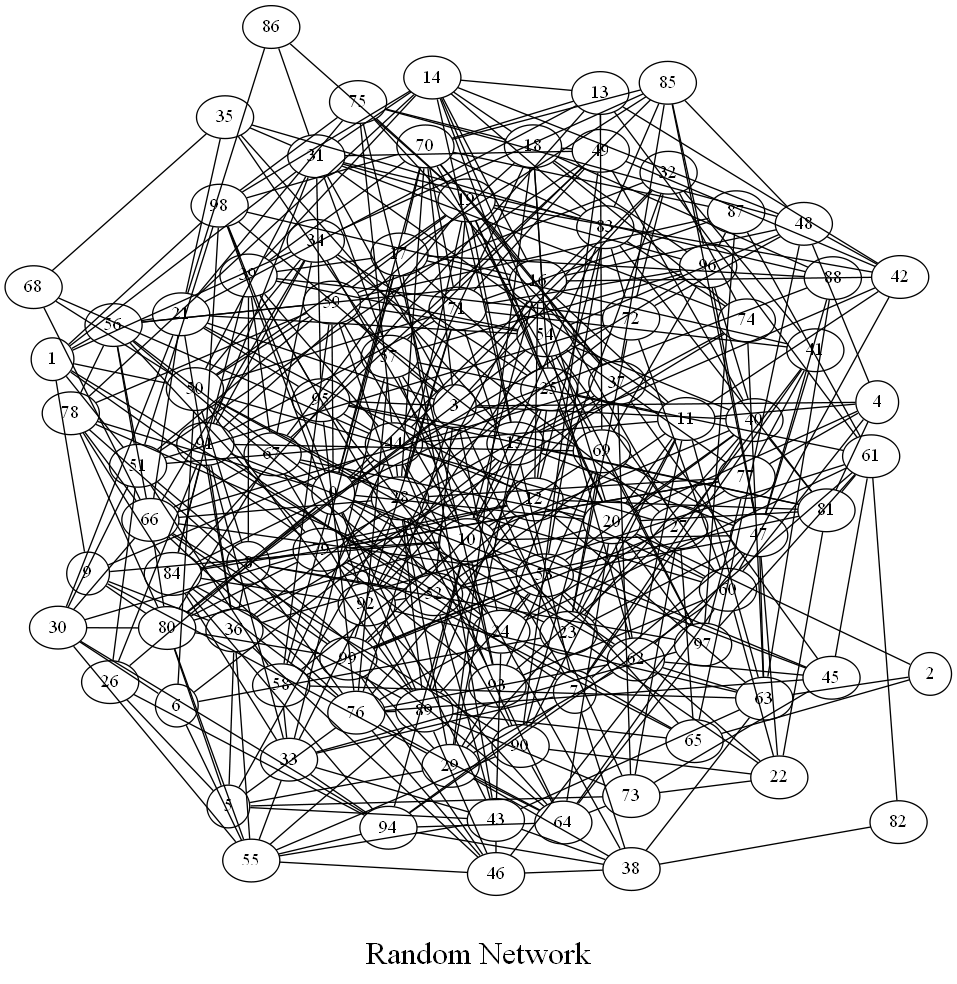

In [11]:
G2 = GenRndGnm(PUNGraph, 100, 500)
DrawGViz(G2, gvlNeato, "G2.png", "Random Network", True)
Image(filename = "G2.png") 

With a larger network, it may be best to find the *distribution* of the degrees of each node.

In [12]:
degree_dist = TIntPrV()
GetDegCnt(G2, degree_dist)
for item in degree_dist:
    print "{} nodes with degree {}".format(item.GetVal2(), item.GetVal1())

1 nodes with degree 2
2 nodes with degree 3
1 nodes with degree 4
2 nodes with degree 5
4 nodes with degree 6
7 nodes with degree 7
12 nodes with degree 8
16 nodes with degree 9
13 nodes with degree 10
14 nodes with degree 11
11 nodes with degree 12
5 nodes with degree 13
7 nodes with degree 14
2 nodes with degree 16
1 nodes with degree 17
1 nodes with degree 18
1 nodes with degree 19


While we have mainly considered smaller and randomly generated networks, we can easily read data in as well using `SNAP`. For example, we can use the data located [here](http://snap.stanford.edu/data/egonets-Facebook.html). Download `facebook_combined.txt.gz` and place the resulting file `facebook_combined.txt` into the directory where this notebook is placed. Note the format: this is simply a `.txt` file with two columns separated by a space. In `LoadEdgeList`, we specify

* The type of network
* The filename/location
* The column indicating the source node
* The column indicating the destination node
* The character used to delimit the source and destination node (in the file)

This dataset contains a network for Facebook friends for 4039 people. Since on Facebook, if person $A$ is a friends with person $B$ then person $B$ is friends with person $A$, our network is **undirected**.

In [13]:
FB_G = LoadEdgeList(PUNGraph, "facebook_combined.txt", 0, 1, " ")
print "Number of Edges: {}".format(sum(1 for _ in FB_G.Edges()))
print "Number of Nodes: {}".format(sum(1 for _ in FB_G.Nodes()))

Number of Edges: 88234
Number of Nodes: 4039


Since the network is so large (88234 edges, 4039 nodes), it may not be particularly useful to visualize it. However, since we have such a large network, we can do some more sophisticated analyses. In particular, a couple of possible analyses we can run are:
* Find the diameter
* Find the distance between 2 nodes
* Find the number of connected components
* Number of triads and average clustering coefficient
* Plot degree distribution

For the diameter of the network, which is the longest shortest path, we can use a function that uses breadth-first search (BFS). The diameter is important since from it, we can determine how "large" a network is.

In [14]:
print GetBfsFullDiam(FB_G, 4039)

8


Next, we can find the distance between nodes. This is useful to determine how close an actor is to other actor. It may be interesting to use PageRank to find influential nodes, then find distances from one node in the influential nodes to other influential nodes. In this case, we'll find the 5 nodes with the highest PageRank and find their distances to each other. Additionally, it may be interesting to also find the average distance from an influential node to all other nodes in the network.

In [15]:
PRankH = TIntFltH()
GetPageRank(FB_G, PRankH)
influential = sorted(range(len(PRankH)), key = lambda node: PRankH[node])[:-6:-1]
for node in influential:
    print "Node: {}, PageRank: {}".format(node, PRankH[node])
    NDistH = TIntH()
    GetShortPath(FB_G, node, NDistH)
    for end in influential:
        if (node != end):
            print "Distance from {} to {}: {}".format(node, end, NDistH[end])
    print "Average Distance from {} to All Other Nodes: {}".format(node, sum([float(NDistH[x]) for x in xrange(4039)]) / 4039)

Node: 3437, PageRank: 0.00757571038901
Distance from 3437 to 107: 2
Distance from 3437 to 1684: 3
Distance from 3437 to 0: 3
Distance from 3437 to 1912: 3
Average Distance from 3437 to All Other Nodes: 3.17974746224
Node: 107, PageRank: 0.00688825159229
Distance from 107 to 3437: 2
Distance from 107 to 1684: 1
Distance from 107 to 0: 1
Distance from 107 to 1912: 2
Average Distance from 107 to All Other Nodes: 2.17479574152
Node: 1684, PageRank: 0.0063094309015
Distance from 1684 to 3437: 3
Distance from 1684 to 107: 1
Distance from 1684 to 0: 2
Distance from 1684 to 1912: 2
Average Distance from 1684 to All Other Nodes: 2.53998514484
Node: 0, PageRank: 0.00622693084793
Distance from 0 to 3437: 3
Distance from 0 to 107: 1
Distance from 0 to 1684: 2
Distance from 0 to 1912: 2
Average Distance from 0 to All Other Nodes: 2.82941322109
Node: 1912, PageRank: 0.00381757323717
Distance from 1912 to 3437: 3
Distance from 1912 to 107: 2
Distance from 1912 to 1684: 2
Distance from 1912 to 0: 2
Av

We can also find the number and size of connected components, which is effectively the number of clusters in the network. This is useful because it can provide an idea of the number and size of communities in the network.

In [16]:
ComponentDist = TIntPrV()
GetWccSzCnt(FB_G, ComponentDist)
for comp in ComponentDist:
    print "Size: %d - Number of Components: %d" % (comp.GetVal1(), comp.GetVal2())

Size: 4039 - Number of Components: 1


Triads, which are a subgraphs of 3 nodes, are fundamental to social network analysis. They can be used to analyze the connectivity among neighbors, along with the average clustering coefficient, which is the degree to which nodes in a graph tend to cluster together. For a given node, its clustering coefficient is defined as:

$$\text{clustering coefficient}(v) = \frac{2 n_{v}}{d_{v}(d_{v} - 1)}$$

where $n_{v}$ is the number of edges between the neighbors of $v$, and $d_{v}$ is the degree of $v$. Hence, for a graph, the average clustering coefficient is defined as:

$$\text{average clustering coefficient}(G) = \frac{1}{|V|} \sum_{i = 1}^{n} C_{i}$$

where $|V|$ is the number of nodes of $G$ and $C_{i}$ is the clustering coefficient for node $i$. Since for a given node, if its neighbors are tied, we would expect there to be mutual trust; thus, networks with higher clustering coefficients tend to have more mutual trust. 

Similarly, we can understand this from a triadic perspective. Closed triads are defined as a triad where all ties are present; i.e. for nodes $A$, $B$, and $C$, $E = \{(A, B), (A, C), (B, C)\}$. Open triads are defined as triad where not all ties are present; i.e. for nodes $A$, $B$, and $C$, $E = \{(A, B), (A, C)\}$. Hence, a higher clustering coefficient for a given node implies that there are more closed triads in the network, as opposed to open triads.

In [17]:
print "Number of Triads: {}".format(GetTriads(FB_G))
print "Clustering Coefficient: {}".format(GetClustCf(FB_G))

Number of Triads: 1612010
Clustering Coefficient: 0.60554671862


Lastly, we can do a simple plot of the degree distribution of the network.

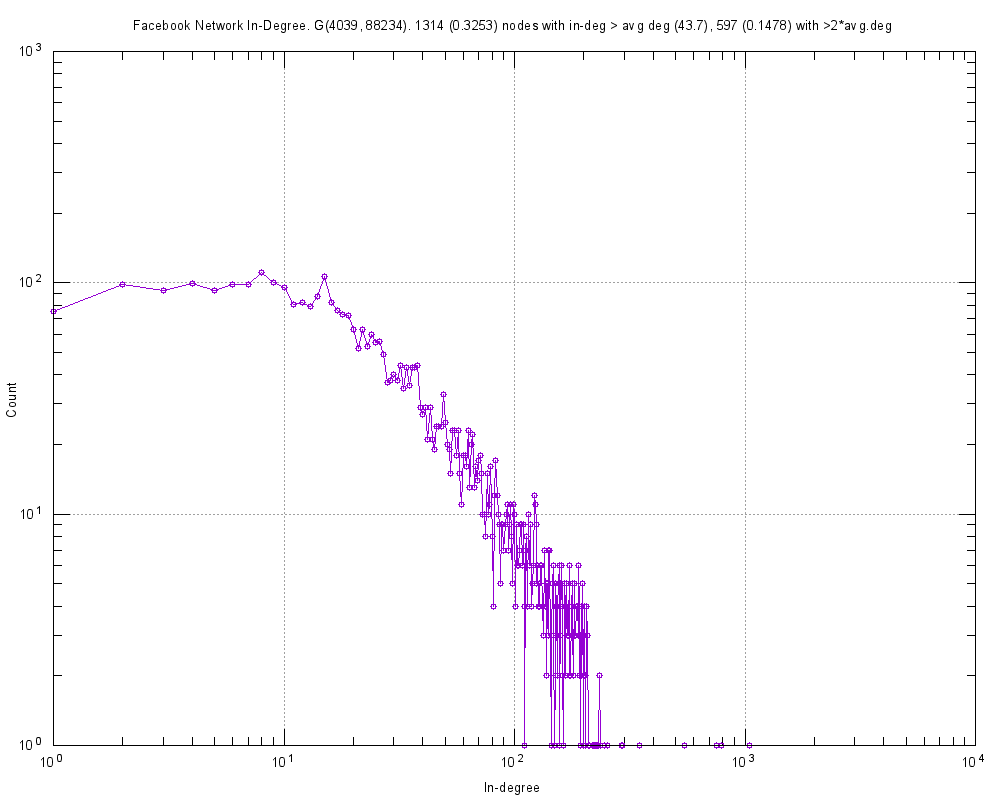

In [18]:
# In-degree equivalent to degree for undirected networks
PlotInDegDistr(FB_G, "Facebook Network", "Facebook Network In-Degree")
Image(filename = "inDeg.Facebook Network.png") 

In addition, `SNAP` provides a way of finding some basic network attributes, some of which we have shown above.

In [19]:
PrintInfo(FB_G, "", "facebook_statistics.txt", False)
with open("facebook_statistics.txt") as f:
    for line in f:
        print line[:-1]

Graph:
  Nodes:                    4039
  Edges:                    88234
  Zero Deg Nodes:           0
  Zero InDeg Nodes:         0
  Zero OutDeg Nodes:        0
  NonZero In-Out Deg Nodes: 4039
  Unique directed edges:    176468
  Unique undirected edges:  88234
  Self Edges:               0
  BiDir Edges:              176468
  Closed triangles:         1612010
  Open triangles:           4478819
  Frac. of closed triads:   0.264662
  Connected component size: 1.000000
  Strong conn. comp. size:  1.000000
  Approx. full diameter:    8
  90% effective diameter:  4.789024


This function is fairly quick--we can also do it for another dataset, located [here](http://snap.stanford.edu/data/egonets-Twitter.html), which contains Twitter data. Download `twitter_combined.txt.gz` and place the resulting file `twitter.txt` into the directory where this notebook is placed. Since on Twitter, person $A$ can follow $B$ but person $B$ will not necessarily follow person $A$, our network is **directed**.

In [20]:
T_G = LoadEdgeList(PNGraph, "twitter_combined.txt", 0, 1, " ")
PrintInfo(T_G, "", "twitter_statistics.txt", False)
with open("twitter_statistics.txt") as f:
    for line in f:
        print line[:-1]

Graph: Directed
  Nodes:                    81306
  Edges:                    1768149
  Zero Deg Nodes:           0
  Zero InDeg Nodes:         1
  Zero OutDeg Nodes:        11209
  NonZero In-Out Deg Nodes: 70096
  Unique directed edges:    1768149
  Unique undirected edges:  1342310
  Self Edges:               14
  BiDir Edges:              851692
  Closed triangles:         13082506
  Open triangles:           190845756
  Frac. of closed triads:   0.064152
  Connected component size: 1.000000
  Strong conn. comp. size:  0.841426
  Approx. full diameter:    7
  90% effective diameter:  4.459826


Despite the fact that this network has so many more nodes and edges (81306 and 1768149, respectively) than the Facebook dataset, `SNAP` is still quite fast, which is its main strength and advantage over other graph modules in Python.

## Summary and References

In this tutorial, we have covered a variety of techniques to analyze networks using `SNAP` in Python. More details about `SNAP` are located at:
* http://snap.stanford.edu/snappy/doc/index.html
* http://snap.stanford.edu/proj/snap-www/

In addition, more datasets that can be used with `SNAP` are located at:
* http://snap.stanford.edu/data/index.html

If you're interested in learning more about social networks in general, some valuable resources are:
* Wasserman, S., and Faust, K. (1994). Social Network Analysis: Methods and Applications. Cambridge, ENG and New York: Cambridge University Press.
* http://faculty.ucr.edu/~hanneman/nettext/

If you're interested in doing social network analysis in other languages (e.g. `R`), you could use:
* https://cran.r-project.org/web/packages/sna/index.html
* http://igraph.org/r/